# start

In [1]:
PRFX = 'MelEda0629A1'
PRFX_PREP = 'MelPrp0629A1'

# setup

In [6]:
from pathlib import Path
import pickle
import pandas as pd
import random
import os
import numpy as np
import matplotlib.pyplot as plt

from torch.utils.data import Dataset, DataLoader

from torchvision import transforms
from PIL import Image
import cv2


In [5]:
p_cmp = '../input/siim-isic-melanoma-classification/'
p_prp = f'../output/{PRFX_PREP}'
dftrn = pd.read_csv(f'{p_prp}/train_all.csv') 
dftst = pd.read_csv(f'{p_prp}/test.csv')

# dataset


```
class MelDataset(Dataset):
    def __init__(self, df, istrn=True):
        self.df = df
        self.istrn = istrn
        self.composed = transforms.Compose([
            transforms.RandomResizedCrop(param.SZ),
            transforms.RandomHorizontalFlip(),
            transforms.RandomVerticalFlip(),
            transforms.ColorJitter(brightness=32. / 255.,saturation=0.5),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
        ])    
    def __getitem__(self, i):
        x = Image.open(self.df.im_pth.values[i]) 
        x = self.composed(x)
        if self.istrn:
            y = self.df.target.values[i]
            return x, y
        else:
            return (x,)
    
    def __len__(self):
        return len(self.df)   
```

http://localhost:8888/notebooks/Google%20Drive/work/K/mel/melanoma-pytorch-starter-efficientnet%20v21.ipynb
```
class MelanomaDataset(Dataset):
    def __init__(self, df: pd.DataFrame, imfolder: str, train: bool = True, transforms = None, meta_features = None):
        """
        Class initialization
        Args:
            df (pd.DataFrame): DataFrame with data description
            imfolder (str): folder with images
            train (bool): flag of whether a training dataset is being initialized or testing one
            transforms: image transformation method to be applied
            meta_features (list): list of features with meta information, such as sex and age
            
        """
        self.df = df
        self.imfolder = imfolder
        self.transforms = transforms
        self.train = train
        self.meta_features = meta_features
        
    def __getitem__(self, index):
        im_path = os.path.join(self.imfolder, self.df.iloc[index]['image_name'] + '.jpg')
        x = cv2.imread(im_path)
        meta = np.array(self.df.iloc[index][self.meta_features].values, dtype=np.float32)

        if self.transforms:
            x = self.transforms(x)
            
        if self.train:
            y = self.df.iloc[index]['target']
            return (x, meta), y
        else:
            return (x, meta)
    
    def __len__(self):
        return len(self.df)
train_transform = transforms.Compose([
    AdvancedHairAugmentation(hairs_folder='/kaggle/input/melanoma-hairs/'),
    transforms.RandomResizedCrop(size=256, scale=(0.7, 1.0)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ColorJitter(brightness=32. / 255.,saturation=0.5),
    Microscope(p=0.6),
#     transforms.Cutout(scale=(0.05, 0.007), value=(0, 0)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
])
test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
])

```

# eda

../output/MelPrp0629A1/siim-isic-melanoma-classification/jpeg/train/ISIC_5038440.jpg


(511, 383)

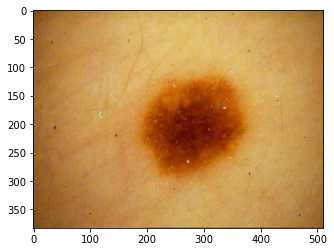

In [18]:
fnm = np.random.choice(dftrn.im_pth)
print(fnm)
x = Image.open(fnm)
plt.imshow(x);
x.size

(383, 511, 3)


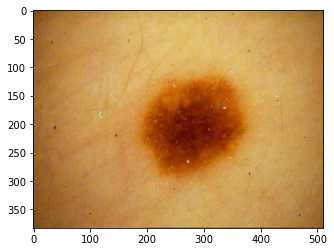

In [22]:
print(np.array(x).shape)
plt.imshow(np.array(x));

(383, 511, 3)


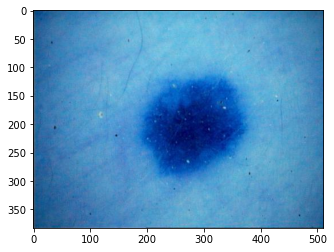

In [23]:
y = cv2.imread(fnm)
print(y.shape)
plt.imshow(y);

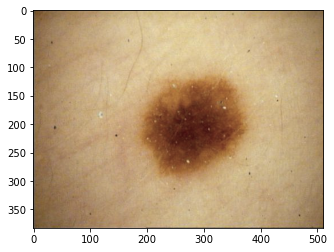

In [28]:
z=transforms.ColorJitter(brightness=32. / 255.,saturation=0.5)(x)
plt.imshow(z);

In [10]:
y

array([[[101, 115, 167],
        [100, 114, 166],
        [ 98, 115, 166],
        ...,
        [140, 149, 193],
        [139, 148, 191],
        [139, 148, 191]],

       [[101, 115, 167],
        [101, 115, 167],
        [101, 115, 167],
        ...,
        [138, 147, 191],
        [139, 148, 191],
        [139, 148, 191]],

       [[101, 114, 166],
        [102, 116, 168],
        [105, 119, 172],
        ...,
        [137, 146, 190],
        [138, 147, 190],
        [138, 147, 190]],

       ...,

       [[103, 105, 146],
        [102, 104, 145],
        [102, 104, 145],
        ...,
        [118, 122, 170],
        [113, 117, 166],
        [113, 117, 166]],

       [[103, 105, 146],
        [102, 104, 145],
        [102, 104, 145],
        ...,
        [116, 120, 168],
        [113, 117, 166],
        [113, 117, 166]],

       [[103, 105, 146],
        [102, 104, 145],
        [102, 104, 145],
        ...,
        [115, 119, 167],
        [114, 118, 167],
        [114, 118, 167]]

## Resize

    size (sequence or int) – Desired output size. If size is a sequence like (h, w), output size will be matched to this. If size is an int, smaller edge of the image will be matched to this number. i.e, if height > width, then image will be rescaled to (size * height / width, size)

../output/MelPrp0628A1/siim-isic-melanoma-classification/jpeg/train/ISIC_1883008.jpg


(6000, 4000)

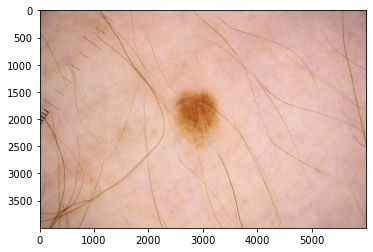

In [60]:
fnm = np.random.choice(dftrn.im_pth)
print(fnm)
x = Image.open(fnm)
plt.imshow(x);
x.size

CPU times: user 189 ms, sys: 1.37 ms, total: 190 ms
Wall time: 636 ms


(336, 224)

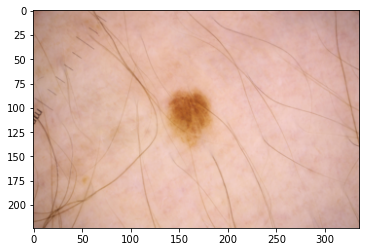

In [105]:
%%time
y = transforms.Resize(224)(x)
plt.imshow(y);
y.size

CPU times: user 21.5 ms, sys: 4.12 ms, total: 25.6 ms
Wall time: 77.5 ms


(192, 128)

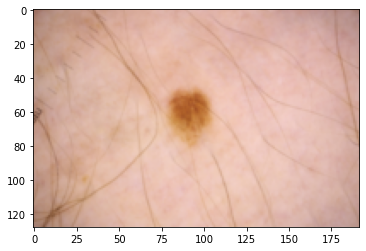

In [106]:
%%time
z = transforms.Resize(128)(y)
plt.imshow(z);
z.size

(224, 224)

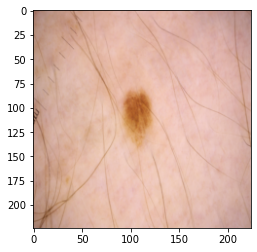

In [72]:
y = transforms.Resize((224, 224))(x)
plt.imshow(y);
y.size

## ColorJitter2

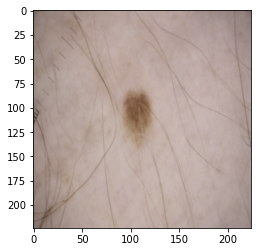

In [84]:
z = transforms.ColorJitter(brightness=32. / 255.,saturation=0.5)(y)
plt.imshow(z);

## others

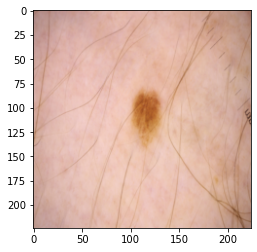

In [73]:
z = transforms.RandomHorizontalFlip()(y)
plt.imshow(z);